In [44]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare
sns.set()

In [60]:
primers_df = pd.read_csv('Eyetracking Data - images-primers.tsv', delimiter='\t')
print(primers_df['emo-primer'].dropna().apply(lambda x: len(x.split(' '))).median())       
primers_df['functional-primer'].dropna().apply(lambda x: len(x.split(' '))).median() 

9.0


7.0

## Load Sequence Data 
To Determine Primers

In [2]:
sequences_df = pd.read_csv('sequences_all.tsv', delimiter='\t')
sequence_order_primer_type_df  = sequences_df.melt(id_vars= sequences_df.columns[0]) 
def funct_or_emo(string):
    if '-emo'in string:
        return 'emotional'
    if '-funct' in string:
        return 'functional'
    if '__' in string:
        return 'crosshair'
    return 'image'

def get_primed_image(string):
    if 'primer'in string:
        return re.search(r"-(?:emo|funct)-(.+)", string).group(1)
    return '_'.join(string.split('_')[1:])
sequence_order_primer_type_df['primer-type'] =  sequence_order_primer_type_df.value.apply(funct_or_emo)
sequence_order_primer_type_df['primed-image'] =  sequence_order_primer_type_df.value.apply(get_primed_image)
sequence_order_primer_type_df

,Sequence name/ Order,variable,value,primer-type,primed-image
0,A,0,0_primer-funct-4_floor-cleaner-4,functional,4_floor-cleaner-4
1,B,0,0_primer-emo-4_floor-cleaner-4,emotional,4_floor-cleaner-4
2,C,0,123_primer-emo-2_car-inside-3,emotional,2_car-inside-3
3,D,0,123_primer-funct-2_car-inside-3,functional,2_car-inside-3
4,E,0,0_primer-funct-4_floor-cleaner-4,functional,4_floor-cleaner-4
...,...,...,...,...,...
1723,H,143,125_2_car-inside-3,image,2_car-inside-3
1724,I,143,20_1_kitchen,image,1_kitchen
1725,J,143,20_1_kitchen,image,1_kitchen
1726,K,143,23_4_floor-cleaner-1,image,4_floor-cleaner-1


In [3]:
sequences_df.columns[0]

'Sequence name/ Order'

In [4]:
survey_df = pd.read_csv('Experiment check list - survey responses.tsv', delimiter='\t')
survey_df.head()

,Timestamp,Please write your Subject ID number,What is your gender?,What is your age?,Are you wearing glasses or contact lenses?,What is your first language?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
0,11/13/2019 20:33:49,P001,Female,26,NaN,NaN,NaN,5,4,4,5,3,2,3,4,4,3
1,11/15/2019 9:18:27,P002,Female,24,I am wearing neither.,Danish,Yes,5,4,4,2,1,5,3,1,1,4
2,11/15/2019 10:00:40,P003,Female,24,I am wearing neither.,Danish,No,5,5,5,5,5,5,3,5,5,3
3,11/15/2019 12:14:16,P004,Female,26,I am wearing neither.,Danish,No,5,5,5,5,4,5,5,5,4,5
4,11/15/2019 12:18:23,P005,Female,24,I am wearing neither.,Lithuanian,Yes,4,4,3,2,3,1,3,2,2,1


In [5]:
survey_df.groupby('What is your gender?').count()

,Timestamp,Please write your Subject ID number,What is your age?,Are you wearing glasses or contact lenses?,What is your first language?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
What is your gender?,,,,,,,,,,,,,,,,
Female,14,14,14,13,13,13,14,14,14,14,14,14,14,14,14,14
Male,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [6]:
1 +3 +8 +5

17

In [7]:
survey_df.groupby('What is your age?').count()

,Timestamp,Please write your Subject ID number,What is your gender?,Are you wearing glasses or contact lenses?,What is your first language?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
What is your age?,,,,,,,,,,,,,,,,
20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
23,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
24,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
25,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
26,7,7,7,6,6,6,7,7,7,7,7,7,7,7,7,7
27,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
29,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
survey_df.groupby('Are you wearing glasses or contact lenses?').count()

,Timestamp,Please write your Subject ID number,What is your gender?,What is your age?,What is your first language?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
Are you wearing glasses or contact lenses?,,,,,,,,,,,,,,,,
Contact lenses,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Glasses,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
I am wearing neither.,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18


In [9]:
survey_df.groupby('What is your first language?').count()

,Timestamp,Please write your Subject ID number,What is your gender?,What is your age?,Are you wearing glasses or contact lenses?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
What is your first language?,,,,,,,,,,,,,,,,
Bulgarian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chinese,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Czech,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Danish,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Dansk,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
English,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Farsi,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
German,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Lithuanian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
survey_df.groupby('Are you currently enrolled in a Cognitive Science course?').count()

,Timestamp,Please write your Subject ID number,What is your gender?,What is your age?,Are you wearing glasses or contact lenses?,What is your first language?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
Are you currently enrolled in a Cognitive Science course?,,,,,,,,,,,,,,,,
No,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Yes,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


## Survey Data
#### Get stats for image ratings 

In [11]:
survey_df.groupby('What is your gender?')

In [12]:
image_cols = [col for col in survey_df.columns if 'image' in col]
image_ratings_df = pd.DataFrame(survey_df[image_cols].mean()).rename(columns={0:'mean'})
image_ratings_df['median'] = survey_df[image_cols].median()
image_ratings_df['stdev'] = survey_df[image_cols].std()
image_ratings_df

,mean,median,stdev
image 1 - face,4.833333,5.0,0.379049
image 2 - face,4.733333,5.0,0.520830
image 3 - face,4.200000,4.5,0.961321
image 4 - face,4.166667,4.5,1.053183
image 5 - face,3.500000,3.5,1.224745
image 6 - face,3.366667,3.0,1.425950
image 7 - face,3.166667,3.0,1.147211
image 8 - face,3.033333,3.0,1.245221
image 9 - face,3.066667,3.0,1.201532
image 10 - face,2.833333,3.0,1.341212


In [13]:
image_ratings_df['mean'].mean()

3.6900000000000004

In [14]:
with open('image_ratings.tex','w') as rf:
    rf.write(image_ratings_df.to_latex(index=True))

In [15]:
subjects_df = pd.read_csv('Experiment check list - subjects.tsv', delimiter='\t')
subjects_df = subjects_df.join(survey_df)
subjects_df

,ID number,name,consent form,lights,TOBII ID,RecordingID,Duration (seconds),Weighted Gaze Samples (%),Gaze Samples (%),callibration,...,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
0,P001,Kornelija,n,"close window, full indoor",P001,Rec 01,457.8,63,64,y,...,5,4,4,5,3,2,3,4,4,3
1,P002,Clara,y,"close window, full indoor",P002,E_P002_rec01,492.4,60,62,y,...,5,4,4,2,1,5,3,1,1,4
2,P003,Tereza,y,"close window, full indoor",P003,F_p003_rec1,411.6,43,43,y,...,5,5,5,5,5,5,3,5,5,3
3,P004,NaN,y,"close window, full indoor",P004,A_p004_rec1,407.4,47,50,y,...,5,5,5,5,4,5,5,5,4,5
4,P005,NaN,y,"close window, full indoor",P005,B_p005_rec1,367.1,7,7,y,...,4,4,3,2,3,1,3,2,2,1
5,P006,NaN,y,"close window, full indoor",P006,C_p006_01,347.8,14,14,y,...,5,4,5,4,4,2,2,3,3,1
6,P007,NaN,y,"close window, full indoor",P007,D_p007_rec1,360.1,93,93,y,...,5,5,5,4,5,4,3,3,3,3
7,P008,NaN,y,"close window, full indoor",P008,E_p008_rec1,410.4,18,19,y,...,5,5,4,4,5,5,3,2,4,2
8,P009,NaN,y,"close window, full indoor",P009,F_009_rec1,391.7,49,49,y,...,5,5,2,5,3,4,4,2,2,2
9,P010,NaN,y,"close window, full indoor",P010,A_P010_rec1,479.6,53,53,y,...,5,5,5,3,3,3,4,3,4,2


In [96]:
subjects_df.groupby('Sequence').count()

,ID number,name,consent form,lights,TOBII ID,RecordingID,Duration (seconds),Weighted Gaze Samples (%),Gaze Samples (%),callibration,...,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
Sequence,,,,,,,,,,,,,,,,,,,,,
A,6,1,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
B,5,0,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
C,5,0,5,5,5,5,5,5,5,4,...,5,5,5,5,5,5,5,5,5,5
D,4,0,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
E,5,1,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
F,5,1,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [100]:
sequence_order_primer_type_df.groupby(['primed-image', 'primer-type']).count()

Sequence name/ Order
primed-image  primer-type                      
10_boat       emotional                       6
              functional                      6
10_boat-1     emotional                       6
              functional                      6
10_boat-2     emotional                       6
...                                         ...
9_furniture-2 functional                      6
9_furniture-3 emotional                       6
              functional                      6
9_furniture-4 emotional                       6
              functional                      6

[96 rows x 1 columns]

Text(0.5, 1.0, '% Gaze Samples tracked')

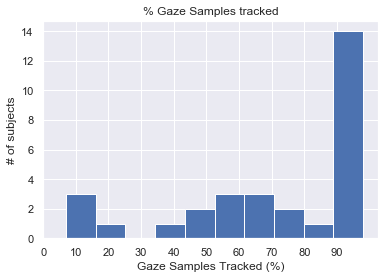

In [16]:
subjects_df["Gaze Samples (%)"].hist()
plt.ylabel("# of subjects")
plt.xlabel("Gaze Samples Tracked (%)")
plt.xticks(np.arange(0, 100, 10))
plt.title("% Gaze Samples tracked")

In [17]:
def get_image_name(x):
    match = re.match(r"(.+\.(?:png|jpg))", x)
    if match is not None:
        #print(match.group(0))
        return '_'.join(match.group(0).split('.')[0].split('_')[2:])
    return None

def get_aoi_name(x):
    return x.split("_")[-2]


## First Fixation Duration

In [18]:
first_fixation_duration_df = pd.read_csv('summary-stats/First Fixation Duration.txt', delimiter='\t')
first_fixation_duration_df.head()

,Unnamed: 0,First Fixation Duration_14_5_car-front-seat.png_face_N,First Fixation Duration_14_5_car-front-seat.png_face_Mean,First Fixation Duration_14_5_car-front-seat.png_face_Max,First Fixation Duration_14_5_car-front-seat.png_face_Min,First Fixation Duration_14_5_car-front-seat.png_face_Sum,First Fixation Duration_14_5_car-front-seat.png_face_Median,First Fixation Duration_14_5_car-front-seat.png_face_Stdev,First Fixation Duration_14_5_car-front-seat.png_Rectangle 2_N,First Fixation Duration_14_5_car-front-seat.png_Rectangle 2_Mean,...,First Fixation Duration_57_9_furniture.png_Rectangle 3_Sum,First Fixation Duration_57_9_furniture.png_Rectangle 3_Median,First Fixation Duration_57_9_furniture.png_Rectangle 3_Stdev,First Fixation Duration_57_9_furniture.png_Not on AOI_N,First Fixation Duration_57_9_furniture.png_Not on AOI_Mean,First Fixation Duration_57_9_furniture.png_Not on AOI_Max,First Fixation Duration_57_9_furniture.png_Not on AOI_Min,First Fixation Duration_57_9_furniture.png_Not on AOI_Sum,First Fixation Duration_57_9_furniture.png_Not on AOI_Median,First Fixation Duration_57_9_furniture.png_Not on AOI_Stdev
0,P001,1,"0,22","0,22","0,22","0,22","0,22",-,1,"0,19",...,-,-,-,-,-,-,-,-,-,-
1,P002,1,"0,32","0,32","0,32","0,32","0,32",-,1,"0,01",...,"0,24","0,24",-,1,"0,17","0,17","0,17","0,17","0,17",-
2,P003,1,"0,39","0,39","0,39","0,39","0,39",-,-,-,...,"0,01","0,01",-,-,-,-,-,-,-,-
3,P004,1,"0,27","0,27","0,27","0,27","0,27",-,-,-,...,"0,25","0,25",-,1,"0,15","0,15","0,15","0,15","0,15",-
4,P005,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [19]:
first_fixation_dur_df = first_fixation_duration_df.melt(
    id_vars=first_fixation_duration_df.columns[0])
first_fixation_dur_df = first_fixation_dur_df.rename(columns={"Unnamed: 0": "ID number"})
first_fixation_dur_df['metric'] = 'First Fixation Duration'
first_fixation_dur_df['image_AOI_measure'] = first_fixation_dur_df[[
    'metric', 'variable']].apply(lambda x: re.sub(x[0]+'_', '', x[1]), axis=1)

first_fixation_dur_df['image'] = first_fixation_dur_df['image_AOI_measure'].apply(get_image_name)
first_fixation_dur_df['AOI'] = first_fixation_dur_df['image_AOI_measure'].apply(lambda x: x.split("_")[-2])
first_fixation_dur_df['measurement'] = first_fixation_dur_df['image_AOI_measure'].apply(lambda x: x.split("_")[-1])
first_fixation_dur_df

,ID number,variable,value,metric,image_AOI_measure,image,AOI,measurement
0,P001,First Fixation Duration_14_5_car-front-seat.pn...,1,First Fixation Duration,14_5_car-front-seat.png_face_N,car-front-seat,face,N
1,P002,First Fixation Duration_14_5_car-front-seat.pn...,1,First Fixation Duration,14_5_car-front-seat.png_face_N,car-front-seat,face,N
2,P003,First Fixation Duration_14_5_car-front-seat.pn...,1,First Fixation Duration,14_5_car-front-seat.png_face_N,car-front-seat,face,N
3,P004,First Fixation Duration_14_5_car-front-seat.pn...,1,First Fixation Duration,14_5_car-front-seat.png_face_N,car-front-seat,face,N
4,P005,First Fixation Duration_14_5_car-front-seat.pn...,-,First Fixation Duration,14_5_car-front-seat.png_face_N,car-front-seat,face,N
...,...,...,...,...,...,...,...,...
6722,P027,First Fixation Duration_57_9_furniture.png_Not...,-,First Fixation Duration,57_9_furniture.png_Not on AOI_Stdev,furniture,Not on AOI,Stdev
6723,P028,First Fixation Duration_57_9_furniture.png_Not...,-,First Fixation Duration,57_9_furniture.png_Not on AOI_Stdev,furniture,Not on AOI,Stdev
6724,P029,First Fixation Duration_57_9_furniture.png_Not...,-,First Fixation Duration,57_9_furniture.png_Not on AOI_Stdev,furniture,Not on AOI,Stdev
6725,P030,First Fixation Duration_57_9_furniture.png_Not...,-,First Fixation Duration,57_9_furniture.png_Not on AOI_Stdev,furniture,Not on AOI,Stdev


In [20]:
analysis_columns = ['ID number','image', 'AOI', 'metric', 'measurement','value','Sequence'] 
first_fixation_dur_seq_df = first_fixation_dur_df.join(subjects_df.set_index("ID number"), on="ID number", rsuffix='_subject')[analysis_columns]
first_fixation_dur_seq_df 

,ID number,image,AOI,metric,measurement,value,Sequence
0,P001,car-front-seat,face,First Fixation Duration,N,1,A
1,P002,car-front-seat,face,First Fixation Duration,N,1,E
2,P003,car-front-seat,face,First Fixation Duration,N,1,F
3,P004,car-front-seat,face,First Fixation Duration,N,1,A
4,P005,car-front-seat,face,First Fixation Duration,N,-,B
...,...,...,...,...,...,...,...
6722,P027,furniture,Not on AOI,First Fixation Duration,Stdev,-,F
6723,P028,furniture,Not on AOI,First Fixation Duration,Stdev,-,A
6724,P029,furniture,Not on AOI,First Fixation Duration,Stdev,-,B
6725,P030,furniture,Not on AOI,First Fixation Duration,Stdev,-,C


In [21]:
sequence_order_primer_type_df = sequence_order_primer_type_df[(sequence_order_primer_type_df['primer-type'] ==
                               'functional') | (sequence_order_primer_type_df['primer-type'] == 'emotional')][['Sequence name/ Order', 'primer-type', 'primed-image'
                                                                                                              ]]

In [22]:
aoi_data_with_primers_df = pd.merge(sequence_order_primer_type_df, first_fixation_dur_seq_df, left_on=[
         'Sequence name/ Order', 'primed-image'], right_on=['Sequence','image']).rename(columns={'value_y': 'value',
                                                                                                'value_x': 'primer-image-name'})

def clean_val(x):
    if isinstance(x, int):
        return x
    if x == '-':
        return None
    if ',' in x:
        return float(re.sub(',', '.', x))
    return float(x)
    

In [23]:
def analyze_measture(measure_name, measurement):
    tobii_measure_df = pd.read_csv(
        'summary-stats/{}.txt'.format(measure_name), delimiter='\t')
    tobii_measure_df = tobii_measure_df.melt(
        id_vars=tobii_measure_df.columns[0])
    tobii_measure_df = tobii_measure_df.rename(
        columns={"Unnamed: 0": "ID number"})
    tobii_measure_df['metric'] = measure_name
    tobii_measure_df['image_AOI_measure'] = tobii_measure_df[[
        'metric', 'variable']].apply(lambda x: re.sub(x[0]+'_', '', x[1]), axis=1)
    tobii_measure_df['image'] = tobii_measure_df['image_AOI_measure'].apply(
        get_image_name)
    tobii_measure_df['AOI'] = tobii_measure_df['image_AOI_measure'].apply(
        lambda x: x.split("_")[-2])
    tobii_measure_df['measurement'] = tobii_measure_df['image_AOI_measure'].apply(
        lambda x: x.split("_")[-1])
    # return tobii_measure_df
    analysis_columns = ['ID number', 'image', 'AOI',
                        'metric', 'measurement', 'value', 'Sequence']
    tobii_measure_seq_df = tobii_measure_df.join(subjects_df.set_index(
        "ID number"), on="ID number", rsuffix='_subject')[analysis_columns]
    tobii_measure_seq_df.to_csv('test_results.csv')
    # return tobii_measure_seq_df
    # return sequence_order_primer_type_df, tobii_measure_df
    aoi_data_with_primers_df = pd.merge(sequence_order_primer_type_df, tobii_measure_seq_df, left_on=[
        'Sequence name/ Order', 'primed-image'], right_on=['Sequence', 'image']).rename(columns={'value_y': 'value',
                                                                                                 'value_x': 'primer-image-name'})
    # return tobii_measure_seq_df, aoi_data_with_primers_df

    def clean_val(x):
        if isinstance(x, int):
            return x
        if x == '-':
            return None
        if ',' in x:
            return float(re.sub(',', '.', x))
        return float(x)

    aoi_data_with_primers_df.value = aoi_data_with_primers_df.value.apply(
        clean_val)
    # return aoi_data_with_primers_df
    emo_primers = aoi_data_with_primers_df[aoi_data_with_primers_df['primer-type'] == 'emotional']
    funct_primers = aoi_data_with_primers_df[aoi_data_with_primers_df['primer-type'] == 'functional']

    gb_cols = ['primed-image', 'AOI']
    func_primers_gb_agg = funct_primers[funct_primers['measurement'] == measurement].groupby(
        gb_cols).agg({'image': 'size', 'value': 'mean'}).rename(columns={'value': 'functional-val', 
                                                                         'image': 'num-datapoints-funct'})
    func_primers_gb_agg['primer'] = 'functional'
    func_primers_gb_agg

    emo_primers_gb_agg = emo_primers[emo_primers['measurement'] == measurement].groupby(
        gb_cols).agg({'image': 'size', 'value': 'mean'}).rename(columns={'value': 'emotional-val', 
                                                                         'image': 'num-datapoints-emo'})
    emo_primers_gb_agg['primer'] = 'emotional'
    aggregate_scores_both_primers = pd.concat([emo_primers_gb_agg,
        func_primers_gb_agg],axis=1, sort=False)
    aggregate_scores_both_primers['measurement'] = measurement
    aggregate_scores_both_primers['aggregate'] = measurement.lower()
    aggregate_scores_both_primers['metric'] = measure_name

    emo_primers[emo_primers['measurement'] ==
                'Mean'].groupby('primed-image').count()

    emo_primers[emo_primers['measurement'] ==
                'Mean'].groupby('primed-image').mean()
    return aoi_data_with_primers_df, aggregate_scores_both_primers


aoi_data_with_primers_df, agg_measure_both_primers = analyze_measture(
    'Time to First Fixation (Across Media)', 'Mean')
agg_measure_both_primers


num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.978333  emotional   
                 Rectangle 2                  16       0.551333  emotional   
                 face                         16       0.956923  emotional   
1_kitchen        Not on AOI                   14       0.029091  emotional   
                 Rectangle 2                  14      12.870909  emotional   
                 face                         14       1.716429  emotional   
2_car-inside     Not on AOI                   16       0.076667  emotional   
                 Rectangle 2                  16       0.623333  emotional   
                 face                         16       0.764000  emotional   
3_house          Not on AOI                   14       0.235000  emotional   
                 Rectangle 2                  14       1.319091  emotional   
                 face                         14       0.346429  emotional   
4_floor-cleaner  Not on AOI                   14       0.055000  emotional   
                 Rectangle 2                  14       1.826250  emotional   
                 face                         14       0.355000  emotional   
5_car-front-seat Not on AOI                   14       0.190000  emotional   
                 Rectangle 2                  14       1.587500  emotional   
                 face                         14       0.335000  emotional   
6_bag            Not on AOI                   16       0.226667  emotional   
                 Rectangle 2                  16       2.059000  emotional   
                 face                         16       0.254615  emotional   
7_coffee         Not on AOI                   14       0.304444  emotional   
                 Rectangle 2                  14       1.990000  emotional   
                 face                         14       0.272857  emotional   
8_instrument     Not on AOI                   14       0.193077  emotional   
                 Rectangle 3                  14       0.874615  emotional   
                 face                         14       0.730769  emotional   
9_furniture      Not on AOI                   14       0.746000  emotional   
                 Rectangle 2                  14       1.422727  emotional   
                 Rectangle 3                  14       1.342500  emotional   
                 face                         14       0.331429  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.397500   
                 Rectangle 2                    14        0.348462   
                 face                           14        1.044167   
1_kitchen        Not on AOI                     16        0.417143   
                 Rectangle 2                    16        1.155385   
                 face                           16        0.690000   
2_car-inside     Not on AOI                     14        1.006364   
                 Rectangle 2                    14        0.899231   
                 face                           14        0.571429   
3_house          Not on AOI                     16        0.140000   
                 Rectangle 2                    16        1.719231   
                 face                           16        0.464375   
4_floor-cleaner  Not on AOI                     16        0.428462   
                 Rectangle 2                    16        0.735000   
                 face                           16        0.488000   
5_car-front-seat Not on AOI                     16        0.147143   
                 Rectangle 2                    16        1.033333   
                 face                           16        0.360000   
6_bag            Not on AOI                     14     

In [24]:
image_ratings_df = image_ratings_df.reset_index()

In [25]:
image_names = list(set(aoi_data_with_primers_df.image.tolist()))
image_names

['10_boat',
 '1_kitchen',
 '5_car-front-seat',
 '6_bag',
 '2_car-inside',
 '8_instrument',
 '3_house',
 '9_furniture',
 '7_coffee',
 '4_floor-cleaner']

In [26]:
for i in range(10):
    image_name = [s for s in image_names if str(i+1)+"_" in s][0]
    image_ratings_df.loc[image_ratings_df['index'] ==
                         "image {} - face".format(i+1), "image-name"] = image_name
image_ratings_df = image_ratings_df.rename(
    columns={"mean": "image-face-rating-mean", "median": "image-face-rating-median",
             "stdev": "image-face-rating-stdev"}).set_index("image-name")
image_ratings_df = image_ratings_df[[x for x in image_ratings_df.columns if x != 'index']]
image_ratings_df

,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
image-name,,,
1_kitchen,4.833333,5.0,0.379049
2_car-inside,4.733333,5.0,0.520830
3_house,4.200000,4.5,0.961321
4_floor-cleaner,4.166667,4.5,1.053183
5_car-front-seat,3.500000,3.5,1.224745
6_bag,3.366667,3.0,1.425950
7_coffee,3.166667,3.0,1.147211
8_instrument,3.033333,3.0,1.245221
9_furniture,3.066667,3.0,1.201532


In [27]:
agg_measure_both_primers

num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.978333  emotional   
                 Rectangle 2                  16       0.551333  emotional   
                 face                         16       0.956923  emotional   
1_kitchen        Not on AOI                   14       0.029091  emotional   
                 Rectangle 2                  14      12.870909  emotional   
                 face                         14       1.716429  emotional   
2_car-inside     Not on AOI                   16       0.076667  emotional   
                 Rectangle 2                  16       0.623333  emotional   
                 face                         16       0.764000  emotional   
3_house          Not on AOI                   14       0.235000  emotional   
                 Rectangle 2                  14       1.319091  emotional   
                 face                         14       0.346429  emotional   
4_floor-cleaner  Not on AOI                   14       0.055000  emotional   
                 Rectangle 2                  14       1.826250  emotional   
                 face                         14       0.355000  emotional   
5_car-front-seat Not on AOI                   14       0.190000  emotional   
                 Rectangle 2                  14       1.587500  emotional   
                 face                         14       0.335000  emotional   
6_bag            Not on AOI                   16       0.226667  emotional   
                 Rectangle 2                  16       2.059000  emotional   
                 face                         16       0.254615  emotional   
7_coffee         Not on AOI                   14       0.304444  emotional   
                 Rectangle 2                  14       1.990000  emotional   
                 face                         14       0.272857  emotional   
8_instrument     Not on AOI                   14       0.193077  emotional   
                 Rectangle 3                  14       0.874615  emotional   
                 face                         14       0.730769  emotional   
9_furniture      Not on AOI                   14       0.746000  emotional   
                 Rectangle 2                  14       1.422727  emotional   
                 Rectangle 3                  14       1.342500  emotional   
                 face                         14       0.331429  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.397500   
                 Rectangle 2                    14        0.348462   
                 face                           14        1.044167   
1_kitchen        Not on AOI                     16        0.417143   
                 Rectangle 2                    16        1.155385   
                 face                           16        0.690000   
2_car-inside     Not on AOI                     14        1.006364   
                 Rectangle 2                    14        0.899231   
                 face                           14        0.571429   
3_house          Not on AOI                     16        0.140000   
                 Rectangle 2                    16        1.719231   
                 face                           16        0.464375   
4_floor-cleaner  Not on AOI                     16        0.428462   
                 Rectangle 2                    16        0.735000   
                 face                           16        0.488000   
5_car-front-seat Not on AOI                     16        0.147143   
                 Rectangle 2                    16        1.033333   
                 face                           16        0.360000   
6_bag            Not on AOI                     14     

In [28]:
firsts = agg_measure_both_primers.index.get_level_values('primed-image')
firsts

Index(['10_boat', '10_boat', '10_boat', '1_kitchen', '1_kitchen', '1_kitchen',
       '2_car-inside', '2_car-inside', '2_car-inside', '3_house', '3_house',
       '3_house', '4_floor-cleaner', '4_floor-cleaner', '4_floor-cleaner',
       '5_car-front-seat', '5_car-front-seat', '5_car-front-seat', '6_bag',
       '6_bag', '6_bag', '7_coffee', '7_coffee', '7_coffee', '8_instrument',
       '8_instrument', '8_instrument', '9_furniture', '9_furniture',
       '9_furniture', '9_furniture'],
      dtype='object', name='primed-image')

In [29]:
# Add face ratings to each image in aggregate scores
agg_measure_both_primers['image-face-rating-mean'] = image_ratings_df.loc[firsts].values[:, 0]
agg_measure_both_primers['image-face-rating-median'] = image_ratings_df.loc[firsts].values[:, 1]
agg_measure_both_primers['image-face-rating-stdev'] = image_ratings_df.loc[firsts].values[:, 2]
agg_measure_both_primers.head(10)

num-datapoints-emo  emotional-val     primer  \
primed-image AOI                                                         
10_boat      Not on AOI                   16       0.978333  emotional   
             Rectangle 2                  16       0.551333  emotional   
             face                         16       0.956923  emotional   
1_kitchen    Not on AOI                   14       0.029091  emotional   
             Rectangle 2                  14      12.870909  emotional   
             face                         14       1.716429  emotional   
2_car-inside Not on AOI                   16       0.076667  emotional   
             Rectangle 2                  16       0.623333  emotional   
             face                         16       0.764000  emotional   
3_house      Not on AOI                   14       0.235000  emotional   

                          num-datapoints-funct  functional-val      primer  \
primed-image AOI                                                             
10_boat      Not on AOI                     14        0.397500  functional   
             Rectangle 2                    14        0.348462  functional   
             face                           14        1.044167  functional   
1_kitchen    Not on AOI                     16        0.417143  functional   
             Rectangle 2                    16        1.155385  functional   
             face                           16        0.690000  functional   
2_car-inside Not on AOI                     14        1.006364  functional   
             Rectangle 2                    14        0.899231  functional   
             face                           14        0.571429  functional   
3_house      Not on AOI                     16        0.140000  functional   

                         measurement aggregate  \
primed-image AOI                                 
10_boat      Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
1_kitchen    Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
2_car-inside Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
3_house      Not on AOI         Mean      mean   

                                                         metric  \
primed-image AOI                                                  
10_boat      Not on AOI   Time to First Fixation (Across Media)   
             Rectangle 2  Time to First Fixation (Across Media)   
             face         Time to First Fixation (Across Media)   
1_kitchen    Not on AOI   Time to First Fixation (Across Media)   
             Rectangle 2  Time to First Fixation (Across Media)   
             face         Time to First Fixation (Across Media)   
2_car-inside Not on AOI   Time to First Fixation (Across Media)   
             Rectangle 2  Time to First Fixation (Across Media)   
             face         Time to First Fixation (Across Media)   
3_house      Not on AOI   Time to First Fixation (Across Media)   

                          image-face-rating-mean  image-face-rating-median  \
primed-image AOI                                                             
10_boat      Not on AOI                 2.833333                       3.0   
             Rectangle 2                2.833333                       3.0   
             face                       2.833333                       3.0   
1_kitchen    Not on AOI                 4.833333                       5.0   
             Rectangle 2                4.833333                       5.0   
             face                       4.833333                       5.0   
2_car-inside Not on AOI                 4.733333                       5.0   
             Rectangle 2                4.733333                       5.0   
             f

In [30]:
agg_measure_both_primers['proves-hypothesis'] = 'none'

In [31]:
# compare means of time to first fixation for each aoi- given a primer

for img in firsts:
    #print(np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], True, False))
    proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], 'true', 'false')
    agg_measure_both_primers.loc[(img,'face'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 2') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 2']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 2']['emotional-val'], 'true', 'false')
        agg_measure_both_primers.loc[(img,'Rectangle 2'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 3') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 3']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 3']['emotional-val'], 'true', 'false' )
        agg_measure_both_primers.loc[(img,'Rectangle 3'),'proves-hypothesis'] = proves_hypothesis

agg_measure_both_primers

num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.978333  emotional   
                 Rectangle 2                  16       0.551333  emotional   
                 face                         16       0.956923  emotional   
1_kitchen        Not on AOI                   14       0.029091  emotional   
                 Rectangle 2                  14      12.870909  emotional   
                 face                         14       1.716429  emotional   
2_car-inside     Not on AOI                   16       0.076667  emotional   
                 Rectangle 2                  16       0.623333  emotional   
                 face                         16       0.764000  emotional   
3_house          Not on AOI                   14       0.235000  emotional   
                 Rectangle 2                  14       1.319091  emotional   
                 face                         14       0.346429  emotional   
4_floor-cleaner  Not on AOI                   14       0.055000  emotional   
                 Rectangle 2                  14       1.826250  emotional   
                 face                         14       0.355000  emotional   
5_car-front-seat Not on AOI                   14       0.190000  emotional   
                 Rectangle 2                  14       1.587500  emotional   
                 face                         14       0.335000  emotional   
6_bag            Not on AOI                   16       0.226667  emotional   
                 Rectangle 2                  16       2.059000  emotional   
                 face                         16       0.254615  emotional   
7_coffee         Not on AOI                   14       0.304444  emotional   
                 Rectangle 2                  14       1.990000  emotional   
                 face                         14       0.272857  emotional   
8_instrument     Not on AOI                   14       0.193077  emotional   
                 Rectangle 3                  14       0.874615  emotional   
                 face                         14       0.730769  emotional   
9_furniture      Not on AOI                   14       0.746000  emotional   
                 Rectangle 2                  14       1.422727  emotional   
                 Rectangle 3                  14       1.342500  emotional   
                 face                         14       0.331429  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.397500   
                 Rectangle 2                    14        0.348462   
                 face                           14        1.044167   
1_kitchen        Not on AOI                     16        0.417143   
                 Rectangle 2                    16        1.155385   
                 face                           16        0.690000   
2_car-inside     Not on AOI                     14        1.006364   
                 Rectangle 2                    14        0.899231   
                 face                           14        0.571429   
3_house          Not on AOI                     16        0.140000   
                 Rectangle 2                    16        1.719231   
                 face                           16        0.464375   
4_floor-cleaner  Not on AOI                     16        0.428462   
                 Rectangle 2                    16        0.735000   
                 face                           16        0.488000   
5_car-front-seat Not on AOI                     16        0.147143   
                 Rectangle 2                    16        1.033333   
                 face                           16        0.360000   
6_bag            Not on AOI                     14     

In [32]:
print( "# of mean scores that prove the hypothesis:", len(agg_measure_both_primers[agg_measure_both_primers['proves-hypothesis'] == 'true']))
print( "# of mean scores that go against the hypothesis:", len(agg_measure_both_primers[agg_measure_both_primers['proves-hypothesis'] == 'false']))

# of mean scores that prove the hypothesis: 14
# of mean scores that go against the hypothesis: 7


# Gaze trail

In [68]:
subject_img_primer = aoi_data_with_primers_df[['ID number','primer-type','image']].drop_duplicates()
subject_img_primer

,ID number,primer-type,image
0,P002,functional,3_house
1,P008,functional,3_house
2,P014,functional,3_house
3,P020,functional,3_house
4,P026,functional,3_house
...,...,...,...
6325,P030,functional,7_coffee
6426,P007,emotional,7_coffee
6427,P013,emotional,7_coffee
6428,P019,emotional,7_coffee


In [103]:
subject_img_primer.groupby(['image','primer-type']).count()#.transpose()

ID number
image            primer-type           
10_boat          emotional           16
                 functional          14
1_kitchen        emotional           14
                 functional          16
2_car-inside     emotional           16
                 functional          14
3_house          emotional           14
                 functional          16
4_floor-cleaner  emotional           14
                 functional          16
5_car-front-seat emotional           14
                 functional          16
6_bag            emotional           16
                 functional          14
7_coffee         emotional           14
                 functional          16
8_instrument     emotional           14
                 functional          16
9_furniture      emotional           14
                 functional          16

In [104]:
with open('img-primer-counts.tex', 'w') as rf:
    rf.write(subject_img_primer.groupby(['image','primer-type']).count().to_latex(index=True))

In [76]:
gaze_df = pd.read_csv('gaze-trail.csv').melt(id_vars='images')
gaze_df

,images,variable,value
0,P001,1_kitchen,0.0
1,P003,1_kitchen,1.0
2,P004,1_kitchen,1.0
3,P009,1_kitchen,1.0
4,P010,1_kitchen,1.0
...,...,...,...
215,P026,10_boat,1.0
216,P027,10_boat,1.0
217,P028,10_boat,0.0
218,P029,10_boat,1.0


In [89]:
subject_img_primer

,ID number,primer-type,image
0,P002,functional,3_house
1,P008,functional,3_house
2,P014,functional,3_house
3,P020,functional,3_house
4,P026,functional,3_house
...,...,...,...
6325,P030,functional,7_coffee
6426,P007,emotional,7_coffee
6427,P013,emotional,7_coffee
6428,P019,emotional,7_coffee


In [88]:
gaze_data_judge = pd.merge(subject_img_primer, gaze_df, left_on=[
         'ID number','image' ], right_on=['images','variable'])#.rename(columns={'value_y': 'value','value_x': 'primer-image-name'})
gaze_data_judge

,ID number,primer-type,image,images,variable,value
0,P014,functional,3_house,P014,3_house,0.0
1,P020,functional,3_house,P020,3_house,1.0
2,P026,functional,3_house,P026,3_house,0.0
3,P003,emotional,3_house,P003,3_house,1.0
4,P009,emotional,3_house,P009,3_house,0.0
...,...,...,...,...,...,...
193,P018,functional,7_coffee,P018,7_coffee,1.0
194,P024,functional,7_coffee,P024,7_coffee,0.0
195,P030,functional,7_coffee,P030,7_coffee,1.0
196,P013,emotional,7_coffee,P013,7_coffee,1.0


Text(0.5, 1.0, 'Mean Face-like-gazes for each image by primer type')

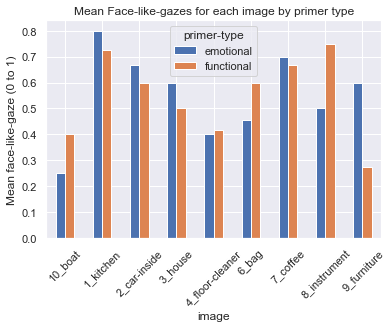

In [94]:
groupby = pd.DataFrame(gaze_data_judge.groupby(['image','primer-type'])['value'].agg('mean'))
groupby.reset_index().pivot(
        index='image', columns='primer-type', values='value').plot.bar()
plt.ylabel('Mean face-like-gaze (0 to 1)')
plt.xticks(rotation=45)
plt.title('Mean Face-like-gazes for each image by primer type' )

In [93]:
groupby

value
image           primer-type          
10_boat         emotional    0.250000
                functional   0.400000
1_kitchen       emotional    0.800000
                functional   0.727273
2_car-inside    emotional    0.666667
                functional   0.600000
3_house         emotional    0.600000
                functional   0.500000
4_floor-cleaner emotional    0.400000
                functional   0.416667
6_bag           emotional    0.454545
                functional   0.600000
7_coffee        emotional    0.700000
                functional   0.666667
8_instrument    emotional    0.500000
                functional   0.750000
9_furniture     emotional    0.600000
                functional   0.272727

## Subject by subject measures:
Calculate for each subject, which AOI was looked at first. Then aggregate based on primer type.

In [33]:
all_subjects_aois_df = pd.merge(aoi_data_with_primers_df, image_ratings_df,
                                left_on='primed-image', right_on='image-name')  # .groupby('ID number')
all_subjects_aois_df = all_subjects_aois_df[all_subjects_aois_df.measurement == 'Mean'].sort_values(['image', 'primer-type','ID number'])
all_subjects_aois_df


,Sequence name/ Order,primer-type,primed-image,ID number,image,AOI,metric,measurement,value,Sequence,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
5256,A,emotional,10_boat,P001,10_boat,face,Time to First Fixation (Across Media),Mean,NaN,A,2.833333,3.0,1.341212
5298,A,emotional,10_boat,P001,10_boat,Rectangle 2,Time to First Fixation (Across Media),Mean,0.01,A,2.833333,3.0,1.341212
5340,A,emotional,10_boat,P001,10_boat,Not on AOI,Time to First Fixation (Across Media),Mean,0.00,A,2.833333,3.0,1.341212
5675,E,emotional,10_boat,P002,10_boat,face,Time to First Fixation (Across Media),Mean,0.50,E,2.833333,3.0,1.341212
5710,E,emotional,10_boat,P002,10_boat,Rectangle 2,Time to First Fixation (Across Media),Mean,NaN,E,2.833333,3.0,1.341212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,A,functional,9_furniture,P028,9_furniture,Not on AOI,Time to First Fixation (Across Media),Mean,0.00,A,3.066667,3.0,1.201532
1269,C,functional,9_furniture,P030,9_furniture,face,Time to First Fixation (Across Media),Mean,0.17,C,3.066667,3.0,1.201532
1304,C,functional,9_furniture,P030,9_furniture,Rectangle 2,Time to First Fixation (Across Media),Mean,1.36,C,3.066667,3.0,1.201532
1339,C,functional,9_furniture,P030,9_furniture,Rectangle 3,Time to First Fixation (Across Media),Mean,0.72,C,3.066667,3.0,1.201532


In [34]:
idx_cols = [ 'image', 'primer-type','AOI', 'ID number']
pivot_df = all_subjects_aois_df.set_index(idx_cols)
pivot_df['value']

image        primer-type  AOI          ID number
10_boat      emotional    face         P001          NaN
                          Rectangle 2  P001         0.01
                          Not on AOI   P001         0.00
                          face         P002         0.50
                          Rectangle 2  P002          NaN
                                                    ... 
9_furniture  functional   Not on AOI   P028         0.00
                          face         P030         0.17
                          Rectangle 2  P030         1.36
                          Rectangle 3  P030         0.72
                          Not on AOI   P030         0.00
Name: value, Length: 930, dtype: float64

In [35]:
image_ratings_df

,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
image-name,,,
1_kitchen,4.833333,5.0,0.379049
2_car-inside,4.733333,5.0,0.520830
3_house,4.200000,4.5,0.961321
4_floor-cleaner,4.166667,4.5,1.053183
5_car-front-seat,3.500000,3.5,1.224745
6_bag,3.366667,3.0,1.425950
7_coffee,3.166667,3.0,1.147211
8_instrument,3.033333,3.0,1.245221
9_furniture,3.066667,3.0,1.201532


In [36]:
pivot_df = pivot_df['value'].unstack().transpose()

In [37]:
pivot_df

image          10_boat                                                 \
primer-type  emotional                   functional                     
AOI         Not on AOI Rectangle 2  face Not on AOI Rectangle 2  face   
ID number                                                               
P001              0.00        0.01   NaN        NaN         NaN   NaN   
P002              1.81         NaN  0.50        NaN         NaN   NaN   
P003               NaN         NaN   NaN       0.17        0.47  3.04   
P004              0.00        0.36  0.55        NaN         NaN   NaN   
P005               NaN         NaN   NaN       0.56         NaN   NaN   
P006               NaN        3.41   NaN        NaN         NaN   NaN   
P007               NaN         NaN   NaN       0.00        1.07  0.17   
P008               NaN        0.46  0.68        NaN         NaN   NaN   
P009               NaN         NaN   NaN       0.92        0.05   NaN   
P010              3.78        0.63  0.46        NaN         NaN   NaN   
P011               NaN         NaN   NaN       2.66        0.27  0.37   
P012              0.00        0.15  0.93        NaN         NaN   NaN   
P013               NaN         NaN   NaN       0.00        0.41  0.19   
P014               NaN        0.47  1.68        NaN         NaN   NaN   
P015               NaN         NaN   NaN       0.00        0.42  2.36   
P016               NaN        0.00  0.64        NaN         NaN   NaN   
P017               NaN         NaN   NaN        NaN        0.49  0.73   
P018              0.00        0.20  3.24        NaN         NaN   NaN   
P019               NaN         NaN   NaN       0.00        0.52  0.28   
P020              0.08        0.56  0.99        NaN         NaN   NaN   
P021               NaN         NaN   NaN       0.46        0.00  1.97   
P022              0.00        0.50  0.73        NaN         NaN   NaN   
P023               NaN         NaN   NaN       0.00        0.48  2.13   
P024              0.00        0.76  0.22        NaN         NaN   NaN   
P025               NaN         NaN   NaN       0.00        0.16  0.85   
P026              2.11        0.18  0.00        NaN         NaN   NaN   
P027               NaN         NaN   NaN       0.00        0.19  0.19   
P028              3.96        0.42   NaN        NaN         NaN   NaN   
P029               NaN         NaN   NaN        NaN        0.00  0.25   
P030              0.00        0.16  1.82        NaN         NaN   NaN   

image        1_kitchen                                ... 8_instrument        \
primer-type  emotional                    functional  ...   functional         
AOI         Not on AOI Rectangle 2   face Not on AOI  ...  Rectangle 3  face   
ID number                                             ...                      
P001               NaN         NaN    NaN       0.00  ...         0.00  0.25   
P002               NaN         NaN    NaN       0.06  ...         1.63  0.43   
P003               NaN        0.52   0.67        NaN  ...          NaN   NaN   
P004               NaN         NaN    NaN       0.00  ...         0.96  0.56   
P005               NaN         NaN   1.73        NaN  ...          NaN   NaN   
P006               NaN         NaN    NaN       1.79  ...          NaN   NaN   
P007              0.00        0.29   0.96        NaN  ...          NaN   NaN   
P008               NaN         NaN    NaN        NaN  ...         0.02  0.53   
P009              0.32        0.00   0.70        NaN  ...          NaN   NaN   
P010               NaN         NaN    NaN       1.32  ...         0.31  0.36   
P011              0.00        0.27   1.21        NaN  ...          NaN   NaN   
P012               NaN         NaN    NaN       0.28  ...         0.26  1.29   
P013              0.00        0.17   0.30        NaN  ...          NaN   NaN   
P014               NaN         NaN    NaN       1.94  ...         0.51  1.72   
P015              0.00      138.18   0.50        NaN  ...          NaN   NaN 

In [38]:
image_names

def check_normality(np_array):
    shapiro = stats.shapiro(np_array)[1]
    if shapiro > 0.05:
        print('shapiro pvalue %s : test is not significant. the data is indicated to be normally distributed.'%(shapiro))
        return True
    else:
        print('shapiro pvalue %s : test is significant. the data is NOT indicated to be normally distributed.'%(shapiro))
        return False



def ttest(col1, col2, equal_var=False):
    ttest_result= stats.ttest_ind(col1, col2, equal_var=equal_var)
    if ttest_result.pvalue < 0.1:
        print('two-sided ttest p-value is less than 0.1: it is not by chance that the sample means are different')
    else:
        print('two-sided ttest p-value is not statistically significant')
    print('independent t-test p-value %s' %(ttest_result.pvalue))
    return ttest_result.pvalue




def mann_whitney_test(a,b):
    # seed the random number generator
    seed(1)
    # compare samples
    print("emo mean {} func mean {}".format(a.mean(), b.mean()))
    stat, p = mannwhitneyu(a,b)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.1
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    return p

tt_first_face_fix_imgs = {}
emo_all = []
funct_all = []
for image in image_names:
    print("\nRunning Welch's t-test for:", image)
    funct_tt_first_face_fix = pivot_df[[
        (x,  'functional', 'face') for x in image_names]][image].dropna()
    emo_tt_first_face_fix = pivot_df[[
        (x,  'emotional', 'face') for x in image_names]][image].dropna()
    a = emo_tt_first_face_fix.transpose().as_matrix()[0]
    b = funct_tt_first_face_fix.transpose().as_matrix()[0]
    emo_all.append(a)
    funct_all.append(b)
    print(a, b)
    tt_first_face_fix_imgs[image] = mann_whitney_test(a, b)

tt_first_face_fix_imgs
funct_all = np.array([item for sublist in funct_all for item in sublist])
emo_all = np.array([item for sublist in emo_all for item in sublist])

out_df = pd.DataFrame.from_dict(
    {k: [v] for k, v in tt_first_face_fix_imgs.items()}, orient='index', columns=['p-value']).sort_values('p-value', ascending=True)
with open('tt_ff_pvalues.tex', 'w') as rf:
    rf.write(out_df.to_latex(index=True))
out_df


Running Welch's t-test for: 10_boat
[0.5  0.55 0.68 0.46 0.93 1.68 0.64 3.24 0.99 0.73 0.22 0.   1.82] [3.04 0.17 0.37 0.19 2.36 0.73 0.28 1.97 2.13 0.85 0.19 0.25]
emo mean 0.956923076923077 func mean 1.0441666666666665
Statistics=72.500, p=0.393
Same distribution (fail to reject H0)

Running Welch's t-test for: 1_kitchen
[ 0.67  1.73  0.96  0.7   1.21  0.3   0.5  15.33  0.59  0.2   0.25  0.44
  0.98  0.17] [0.18 0.29 0.58 1.96 2.22 0.48 0.33 0.42 0.43 0.59 0.6  0.2  0.92 0.46]
emo mean 1.7164285714285714 func mean 0.6900000000000001
Statistics=82.000, p=0.238
Same distribution (fail to reject H0)

Running Welch's t-test for: 5_car-front-seat
[0.78 0.54 0.55 0.18 0.19 0.58 0.2  0.3  0.16 0.   0.17 0.37] [0.37 0.39 0.14 0.81 0.41 0.57 0.38 0.56 0.18 0.23 0.42 0.34 0.39 0.21
 0.18 0.18]
emo mean 0.33499999999999996 func mean 0.36
Statistics=82.000, p=0.265
Same distribution (fail to reject H0)

Running Welch's t-test for: 6_bag
[0.25 0.17 0.21 0.17 0.3  0.13 0.22 0.19 0.21 0.49 0.56 0.

/Users/sallyisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/sallyisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,p-value
8_instrument,0.110999
7_coffee,0.196904
2_car-inside,0.228979
1_kitchen,0.238114
5_car-front-seat,0.265083
9_furniture,0.270422
3_house,0.280047
10_boat,0.392785
6_bag,0.418571
4_floor-cleaner,0.473879


In [ ]:
!pip install researchpy

In [40]:
# todo ask julia: can we assume that no fixation on the non-target AOI means that they never looked there
# and we can count a fixation on the target AOI as counting towards our hypothesis?
image_rating_first_fixation_counts = []
for img in image_ratings_df.index:
    face_rating = image_ratings_df[image_ratings_df.index ==
                               img]['image-face-rating-mean'].values[0]
    for primer_type in ('emotional', 'functional'):
        compare_values_df = pivot_df[img][primer_type]
        min_cols = compare_values_df[[x for x in compare_values_df.columns if x != 'Not on AOI']
                                                           ].idxmin(axis=1)
        face_rating = image_ratings_df[image_ratings_df.index ==
                                       img]['image-face-rating-mean'].values[0]
        print(img, primer_type, " overall face rating: ", face_rating)
        print(min_cols)
        min_cols_count = pd.DataFrame(min_cols).reset_index().groupby(0).count()
        print(min_cols_count)
        face_first_fix = min_cols_count.loc['face'].values[0]
        all_aoi_first_fix = min_cols_count.reset_index()["ID number"].sum()
        image_rating_first_fixation_counts.append({'image': img,
                                                                'primer-type': primer_type,
                                                                'num_faces_first': face_first_fix,
                                                               'num_NON_faces_first': all_aoi_first_fix - face_first_fix,
                                                              'all_aoi_first_fixations': all_aoi_first_fix,
                                                               '% first fixations faces': face_first_fix/all_aoi_first_fix,
                                                               '% first fixations NOT faces': 1- (face_first_fix/all_aoi_first_fix),
                                                               'face-rating': face_rating
                                                              })

metrics_rows = []
#for k, v in image_rating_first_fixation_counts.items():
#    for metrics, 
#    metrics_rows.append()
first_fixation_final = pd.DataFrame(image_rating_first_fixation_counts)
first_fixation_final

1_kitchen emotional  overall face rating:  4.833333333333333
ID number
P001            NaN
P002            NaN
P003    Rectangle 2
P004            NaN
P005           face
P006            NaN
P007    Rectangle 2
P008            NaN
P009    Rectangle 2
P010            NaN
P011    Rectangle 2
P012            NaN
P013    Rectangle 2
P014            NaN
P015           face
P016            NaN
P017           face
P018            NaN
P019    Rectangle 2
P020            NaN
P021           face
P022            NaN
P023           face
P024            NaN
P025    Rectangle 2
P026            NaN
P027    Rectangle 2
P028            NaN
P029           face
P030            NaN
dtype: object
             ID number
0                     
Rectangle 2          8
face                 6
1_kitchen functional  overall face rating:  4.833333333333333
ID number
P001           face
P002           face
P003            NaN
P004           face
P005            NaN
P006           face
P007            NaN
P008       

,image,primer-type,num_faces_first,num_NON_faces_first,all_aoi_first_fixations,% first fixations faces,% first fixations NOT faces,face-rating
0,1_kitchen,emotional,6,8,14,0.428571,0.571429,4.833333
1,1_kitchen,functional,6,8,14,0.428571,0.571429,4.833333
2,2_car-inside,emotional,6,9,15,0.400000,0.600000,4.733333
3,2_car-inside,functional,7,7,14,0.500000,0.500000,4.733333
4,3_house,emotional,12,2,14,0.857143,0.142857,4.200000
5,3_house,functional,15,1,16,0.937500,0.062500,4.200000
6,4_floor-cleaner,emotional,12,2,14,0.857143,0.142857,4.166667
7,4_floor-cleaner,functional,8,7,15,0.533333,0.466667,4.166667
8,5_car-front-seat,emotional,11,2,13,0.846154,0.153846,3.500000
9,5_car-front-seat,functional,11,5,16,0.687500,0.312500,3.500000


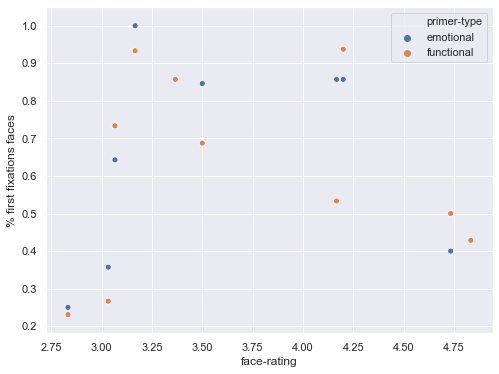

In [41]:

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='face-rating', y='% first fixations faces', hue='primer-type', data=first_fixation_final) 
plt.show()

In [47]:
first_fixation_final

,image,primer-type,num_faces_first,num_NON_faces_first,all_aoi_first_fixations,% first fixations faces,% first fixations NOT faces,face-rating
0,1_kitchen,emotional,6,8,14,0.428571,0.571429,4.833333
1,1_kitchen,functional,6,8,14,0.428571,0.571429,4.833333
2,2_car-inside,emotional,6,9,15,0.400000,0.600000,4.733333
3,2_car-inside,functional,7,7,14,0.500000,0.500000,4.733333
4,3_house,emotional,12,2,14,0.857143,0.142857,4.200000
5,3_house,functional,15,1,16,0.937500,0.062500,4.200000
6,4_floor-cleaner,emotional,12,2,14,0.857143,0.142857,4.166667
7,4_floor-cleaner,functional,8,7,15,0.533333,0.466667,4.166667
8,5_car-front-seat,emotional,11,2,13,0.846154,0.153846,3.500000
9,5_car-front-seat,functional,11,5,16,0.687500,0.312500,3.500000


In [50]:
nobs = first_fixation_final.pivot(
        index='image', columns='primer-type', values='all_aoi_first_fixations').transpose().as_matrix()
nobs

first_fix_chi2_matrix = first_fixation_final.pivot(
        index='image', columns='primer-type', values='num_faces_first').transpose().as_matrix()
first_fix_chi2_matrix

proportions_chisquare(count=first_fix_chi2_matrix, nobs=nobs)

(7.719784895368756,
 0.9999999328543561,
 (array([[ 4,  6,  6, 12, 12, 11, 12, 14,  5,  9, 12,  8,  9,  2,  2,  2,
           2,  0,  9,  5],
         [ 3,  6,  7, 15,  8, 11, 12, 14,  4, 11, 10,  8,  7,  1,  7,  5,
           2,  1, 11,  4]]),
  array([[ 3.43944637,  5.89619377,  6.38754325, 13.26643599,  9.82698962,
          10.80968858, 11.79238754, 13.75778547,  4.42214533,  9.82698962,
          10.80968858,  7.8615917 ,  7.8615917 ,  1.47404844,  4.42214533,
           3.43944637,  1.96539792,  0.49134948,  9.82698962,  4.42214533],
         [ 3.56055363,  6.10380623,  6.61245675, 13.73356401, 10.17301038,
          11.19031142, 12.20761246, 14.24221453,  4.57785467, 10.17301038,
          11.19031142,  8.1384083 ,  8.1384083 ,  1.52595156,  4.57785467,
           3.56055363,  2.03460208,  0.50865052, 10.17301038,  4.57785467]])))

In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(first_fix_chi2_matrix)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

In [ ]:

ax = first_fixation_final.pivot(
        index='image', columns='primer-type', values='% first fixations faces').plot.bar(xticks=sorted(first_fixation_final['face-rating']))
ax.set_ylabel("% of subject with first fixation on face")
ax.set_xlabel("image name")
plt.xticks(rotation=45)
plt.title("% of First AOI Fixations on Face AOI by Image\nfor emotional vs. functional primer")

In [ ]:
# compare means of time to first fixation for each aoi- given a primer

for img in firsts:
    #print(np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], True, False))
    proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], 'true', 'false')
    agg_measure_both_primers.loc[(img,'face'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 2') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 2']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 2']['emotional-val'], 'true', 'false')
        agg_measure_both_primers.loc[(img,'Rectangle 2'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 3') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 3']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 3']['emotional-val'], 'true', 'false' )
        agg_measure_both_primers.loc[(img,'Rectangle 3'),'proves-hypothesis'] = proves_hypothesis

agg_measure_both_primers